In [1]:
#Python Warning off
import warnings
warnings.filterwarnings('ignore')

#TF warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.models import Sequential # 건물, 뇌
from keras.layers import Dense # 각 층, 뉴런 모음
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
#making Data
x = np.random.uniform(-np.pi , np.pi,500) #uniform is regular distribution
# you have to write np in front of pi in order to not make error 
y= np.random.uniform(-1,1,500)
#x와 y를 각자의 범위내에서 각각 균등하게 500개씩 무작위 추출했다. 

# 2차원 구조로 만들어 준다. 왜?
# 각각 따로 존재하는 x & y를 하나의 행렬에 묶기 위해
X = np.array( [ [x[i],y[i] ] for i in range(500)])

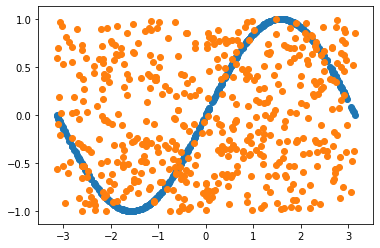

In [5]:
sine = np.sin(x)
plt.scatter(x, sine)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
Y = X[:,1] > sine
Y[:5]

array([ True, False, False, False, False])

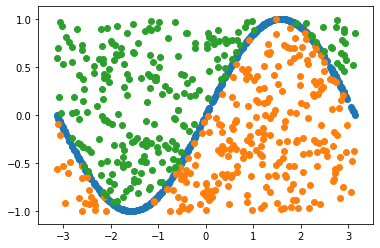

In [7]:
plt.scatter(x,sine)
plt.scatter(X[:,0][Y==0], X[:,1][Y==0])
plt.scatter(X[:,0][Y==1], X[:,1][Y==1])
plt.show()

In [8]:
model = Sequential() #건물
model.add( Dense(10, activation='relu', input_shape=(2,)) ) 
# 건물 1층에 사무실 10개가 있고, 2층 올라가는 계단의 종류는 relu, 입구에는 2명씩 들어온다 (input_shape는 x축 y축 2개) 
# 무 친 설 명 
model.add(Dense(10, activation ='relu'))
# 건물 1층에 사무실 10개가 있고, 3층 올라가는 계단의 종류는 relu, 입구는 1층에만 있다. 
model.add(Dense(10, activation='relu'))
# 건물 1층에 사무실 10개가 있고, 4층 올라가는 계단의 종류는 relu, 역시 입구는 따로 없다. 
model.add(Dense(10, activation='relu'))
# 마찬가지 
model.add(Dense(2,activation='softmax'))
# 마지막 5층에는 사무실이 2개, 다중 분류용 softmax인데 이진에서도 쓰인다. 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 비용 함수와 옵티마이저 설정 
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [10]:
# One Hot Encoding
# 현재 Y는 true false 값이다 
# 이 녀석을 이대로 두는게 아니라 One hot encoding 해야 한다. 
Y_onehot = np_utils.to_categorical(Y)
Y_onehot
# True => [0,1]
# False => [1,0]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [11]:
#훈련
model.fit(X,Y_onehot,epochs=200)

Epoch 1/200
500/500 [==============================] - 0s 313us/step - loss: 0.6490
Epoch 2/200
500/500 [==============================] - 0s 22us/step - loss: 0.6212
Epoch 3/200
500/500 [==============================] - 0s 22us/step - loss: 0.5987
Epoch 4/200
500/500 [==============================] - 0s 22us/step - loss: 0.5772
Epoch 5/200
500/500 [==============================] - 0s 22us/step - loss: 0.5560
Epoch 6/200
500/500 [==============================] - 0s 20us/step - loss: 0.5346
Epoch 7/200
500/500 [==============================] - 0s 20us/step - loss: 0.5130
Epoch 8/200
500/500 [==============================] - 0s 26us/step - loss: 0.4916
Epoch 9/200
500/500 [==============================] - 0s 20us/step - loss: 0.4708
Epoch 10/200
500/500 [==============================] - 0s 20us/step - loss: 0.4515
Epoch 11/200
500/500 [==============================] - 0s 18us/step - loss: 0.4336
Epoch 12/200
500/500 [==============================] - 0s 20us/step - loss: 0.4185


500/500 [==============================] - 0s 16us/step - loss: 0.1808
Epoch 99/200
500/500 [==============================] - 0s 18us/step - loss: 0.1784
Epoch 100/200
500/500 [==============================] - 0s 18us/step - loss: 0.1767
Epoch 101/200
500/500 [==============================] - 0s 18us/step - loss: 0.1763
Epoch 102/200
500/500 [==============================] - 0s 18us/step - loss: 0.1749
Epoch 103/200
500/500 [==============================] - 0s 18us/step - loss: 0.1727
Epoch 104/200
500/500 [==============================] - 0s 16us/step - loss: 0.1714
Epoch 105/200
500/500 [==============================] - 0s 18us/step - loss: 0.1709
Epoch 106/200
500/500 [==============================] - 0s 18us/step - loss: 0.1685
Epoch 107/200
500/500 [==============================] - 0s 18us/step - loss: 0.1679
Epoch 108/200
500/500 [==============================] - 0s 18us/step - loss: 0.1665
Epoch 109/200
500/500 [==============================] - 0s 18us/step - loss: 0.

500/500 [==============================] - 0s 18us/step - loss: 0.0911
Epoch 195/200
500/500 [==============================] - 0s 20us/step - loss: 0.0948
Epoch 196/200
500/500 [==============================] - 0s 20us/step - loss: 0.0949
Epoch 197/200
500/500 [==============================] - 0s 18us/step - loss: 0.0934
Epoch 198/200
500/500 [==============================] - 0s 18us/step - loss: 0.0912
Epoch 199/200
500/500 [==============================] - 0s 16us/step - loss: 0.0902
Epoch 200/200
500/500 [==============================] - 0s 18us/step - loss: 0.0901


In [12]:
print("test loss : {:.2f}".format(model.evaluate(X,Y_onehot)))

500/500 [==============================] - 0s 50us/step
test loss : 0.09


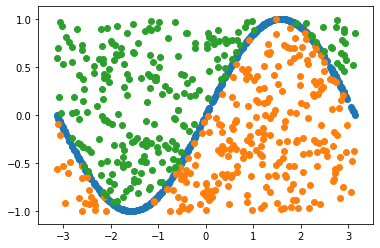

In [13]:
# 다시 초기 상황 보기 위해
plt.scatter(x,sine)
plt.scatter(X[:,0][Y==0], X[:,1][Y==0])
plt.scatter(X[:,0][Y==1], X[:,1][Y==1])
plt.show()

In [14]:
# 위에서 초록영역과 주황영역 하나씩 뽑아서 테스트 데이터 pred_x 생성
a = [-2,0]  #초록영역 점, Y_onehot [0,1]
b = [2,0] # 주황영역 점, Y_onehot [1,0]
pred_x = np.vstack( (a,b))

# test
pred = model.predict(pred_x)
pred
# array([[0.00106801, 0.99893194],
#      [0.9793256 , 0.02067444]], dtype=float32)
# 해석: [오렌지색일 확률, 초록색일 확률]
# [-2,0] => 99.8% 확률로 초록색
# [2,0] => 97.9% 확률로 주황색 

# 내가 놀란점. a를 경계면 가까이 위치시키면 확률이 떨어질거라 생각했는데, -0.8로 했을때 확률이 99.99% 였다. 
# 그 말은 즉, 경계면까지 거리와 확률은 관계가 없단 말이다. 
# 초록점의 분포, 밀도에 더욱 연관이 있을것이고, 그래서 점이 빽빽한 곳이라면 경계와 가까워도 확률이 높을 수 있다. 

array([[1.0869001e-02, 9.8913097e-01],
       [9.9934143e-01, 6.5849937e-04]], dtype=float32)

In [15]:
# uci dataset
# adult.data
# 수입이 50k 보다 많은지 적인지를 분류하는 실습

In [16]:
# 필요한 것들
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler

In [17]:
# | This data was extracted from the census bureau database found at
# | http://www.census.gov/ftp/pub/DES/www/welcome.html
# | Donor: Ronny Kohavi and Barry Becker,
# |        Data Mining and Visualization
# |        Silicon Graphics.
# |        e-mail: ronnyk@sgi.com for questions.
# | Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
# | 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
# | 45222 if instances with unknown values are removed (train=30162, test=15060)
# | Duplicate or conflicting instances : 6
# | Class probabilities for adult.all file
# | Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
# | Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
# |
# | Extraction was done by Barry Becker from the 1994 Census database.  A set of
# |   reasonably clean records was extracted using the following conditions:
# |   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
# |
# | Prediction task is to determine whether a person makes over 50K
# | a year.
# |
# | First cited in:
# | @inproceedings{kohavi-nbtree,
# |    author={Ron Kohavi},
# |    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
# |           Decision-Tree Hybrid},
# |    booktitle={Proceedings of the Second International Conference on
# |               Knowledge Discovery and Data Mining},
# |    year = 1996,
# |    pages={to appear}}
# |
# | Error Accuracy reported as follows, after removal of unknowns from
# |    train/test sets):
# |    C4.5       : 84.46+-0.30
# |    Naive-Bayes: 83.88+-0.30
# |    NBTree     : 85.90+-0.28
# |
# |
# | Following algorithms were later run with the following error rates,
# |    all after removal of unknowns and using the original train/test split.
# |    All these numbers are straight runs using MLC++ with default values.
# |
# |    Algorithm               Error
# | -- ----------------        -----
# | 1  C4.5                    15.54
# | 2  C4.5-auto               14.46
# | 3  C4.5 rules              14.94
# | 4  Voted ID3 (0.6)         15.64
# | 5  Voted ID3 (0.8)         16.47
# | 6  T2                      16.84
# | 7  1R                      19.54
# | 8  NBTree                  14.10
# | 9  CN2                     16.00
# | 10 HOODG                   14.82
# | 11 FSS Naive Bayes         14.05
# | 12 IDTM (Decision table)   14.46
# | 13 Naive-Bayes             16.12
# | 14 Nearest-neighbor (1)    21.42
# | 15 Nearest-neighbor (3)    20.35
# | 16 OC1                     15.04
# | 17 Pebls                   Crashed.  Unknown why (bounds WERE increased)
# |
# | Conversion of original data as follows:
# | 1. Discretized agrossincome into two ranges with threshold 50,000.
# | 2. Convert U.S. to US to avoid periods.
# | 3. Convert Unknown to "?"
# | 4. Run MLC++ GenCVFiles to generate data,test.
# |
# | Description of fnlwgt (final weight)
# |
# | The weights on the CPS files are controlled to independent estimates of the
# | civilian noninstitutional population of the US.  These are prepared monthly
# | for us by Population Division here at the Census Bureau.  We use 3 sets of
# | controls.
# |  These are:
# |          1.  A single cell estimate of the population 16+ for each state.
# |          2.  Controls for Hispanic Origin by age and sex.
# |          3.  Controls by Race, age and sex.
# |
# | We use all three sets of controls in our weighting program and "rake" through
# | them 6 times so that by the end we come back to all the controls we used.
# |
# | The term estimate refers to population totals derived from CPS by creating
# | "weighted tallies" of any specified socio-economic characteristics of the
# | population.
# |
# | People with similar demographic characteristics should have
# | similar weights.  There is one important caveat to remember
# | about this statement.  That is that since the CPS sample is
# | actually a collection of 51 state samples, each with its own
# | probability of selection, the statement only applies within
# | state.


# >50K, <=50K.

# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [18]:
names = [ 'age','workclass','fnlwgt','education','education_num','maritial-status',
        'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
        'native-country', '5k']
# column 적게 입력하면 부족한 만큼 뒤에서부터 잘린다. 

In [19]:
df = pd.read_csv('datasets/adult.data', index_col=False, names=names )

In [20]:
# 상위 5개 항목 실제 데이터 확인
df.head()

,age,workclass,fnlwgt,education,education_num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,5k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
#데이터 프레임 크기 확인
df.shape

(32561, 15)

In [22]:
# column별 통계량 확인
df.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
#결측 데이터 확인
df.count()

age                32561
workclass          32561
fnlwgt             32561
education          32561
education_num      32561
maritial-status    32561
occupation         32561
relationship       32561
race               32561
sex                32561
capital-gain       32561
capital-loss       32561
hours-per-week     32561
native-country     32561
5k                 32561
dtype: int64

In [24]:
df.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
education_num      False
maritial-status    False
occupation         False
relationship       False
race               False
sex                False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
5k                 False
dtype: bool

 <=50K    24720
 >50K      7841
Name: 5k, dtype: int64


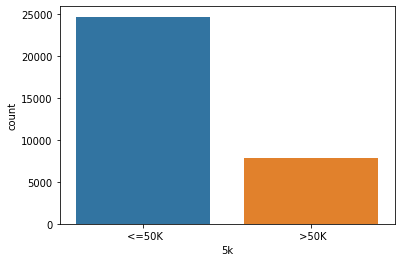

In [25]:
#시각화, 5k column의 양 확인
print(df['5k'].value_counts())
sns.countplot('5k', data=df)

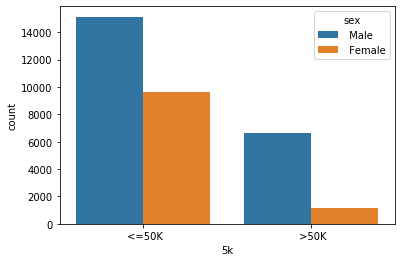

In [26]:
#성별에 따른 5k 분포
sns.countplot('5k', hue='sex', data=df)

In [27]:
# column끼리의 상관관계
# 값이 클 수록 상관관계가 크다. 
df.corr()
# 하루 작업량과 학습량은 상관관계 있음, 자본수입과 학습량 상관관계 있음. 

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


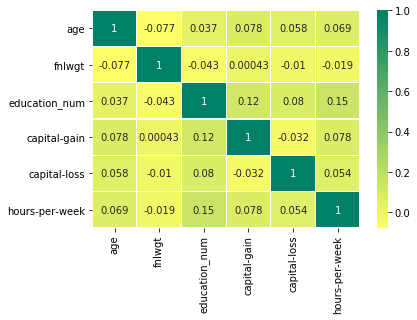

In [28]:
sns.heatmap(
    df.corr(), annot=True, cmap='summer_r', linewidths=0.2)

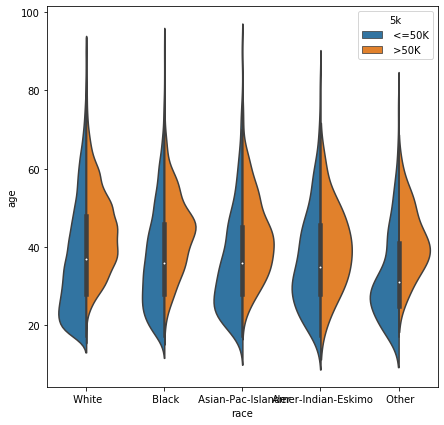

In [29]:
# 인종 나이와 관계.
# 인종은 범주, 나이는 연속데이터.
plt.figure(figsize=(7,7))
sns.violinplot('race', 'age', hue='5k', data=df, split=True)
# 그래프 차이가 그닥 안남. 나이와 인종과는 무관한듯하다. 

In [30]:
# array와 list의 차이가 뭐지 
# 어쨌든 array라는 df의 데이터를 list로 만들어서 새로운 변수 Y에 할당한다.
#df['5k'].values
Y = df['5k'].values.tolist()
#Y
# 현재 데이터가  <=50K 이런식이다. 이걸 0, 1 로 바꿔주자. 
Y = [ 1 if i == ' <=50K' else 0 for i in Y] #' <=50K'는 1 그게 아니면 0 

#이걸 One hot encoding 하자
Y= np_utils.to_categorical(Y)
#Y[:10] 
# ' <=50K' ==> 1 ==> [0,1]
# ' >50K' ==> 0 ==> [1,0]

In [31]:
# info 보면 Dtype이 int64인게 있고, 아닌게(?) 있다. 
# 여기서 int는 따로 우선 뽑아 놓고, 남은 것들은 one hot encoding 해야 한다. 
#df.info()
nums = ['age','fnlwgt','education_num','capital-gain', 'capital-loss','hours-per-week']
# 뽑는법 df.drop을 이용
X = df.drop(nums, axis=1) # nums 빼고 문자 데이터만 얻기
#X.info()
X = X.drop('5k', axis=1)
#One hot encoding 시작 
X = pd.get_dummies(X, drop_first=True)
X.head()

#아까 뽑아놓은 숫자들이랑 병합하기 
X = pd.concat( [X, df[nums]], axis=1)

X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40


In [32]:
# 범위가 너무 큰 데이터들은 MinMaxScaler로 줄여주기
scaler = MinMaxScaler()
X[nums]= scaler.fit_transform(X[nums])
X.shape

X_train = X[:-1000]
X_test = X[-1000:]
#X_train.shape, X_test,shape
Y_train = Y[:-1000]
Y_test = Y[-1000:]

In [33]:
# Model 생성
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,))) # the number of nerun is 2^n standard value is 128(2^7)
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [34]:
#model compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
#Model 훈련
hist = model.fit(X_train,Y_train, epochs=10, validation_split=0.2)

Train on 25248 samples, validate on 6313 samples
Epoch 1/10
25248/25248 [==============================] - 9s 370us/step - loss: 0.3598 - acc: 0.8333 - val_loss: 0.3386 - val_acc: 0.8435
Epoch 2/10
25248/25248 [==============================] - 9s 358us/step - loss: 0.3297 - acc: 0.8462 - val_loss: 0.3255 - val_acc: 0.8489
Epoch 3/10
25248/25248 [==============================] - 9s 348us/step - loss: 0.3179 - acc: 0.8528 - val_loss: 0.3226 - val_acc: 0.8509
Epoch 4/10
25248/25248 [==============================] - 9s 349us/step - loss: 0.3104 - acc: 0.8559 - val_loss: 0.3247 - val_acc: 0.8505
Epoch 5/10
25248/25248 [==============================] - 9s 354us/step - loss: 0.3039 - acc: 0.8585 - val_loss: 0.3323 - val_acc: 0.8487
Epoch 6/10
25248/25248 [==============================] - 9s 353us/step - loss: 0.2972 - acc: 0.8620 - val_loss: 0.3233 - val_acc: 0.8503
Epoch 7/10
25248/25248 [==============================] - 9s 352us/step - loss: 0.2893 - acc: 0.8665 - val_loss: 0.3344 - v

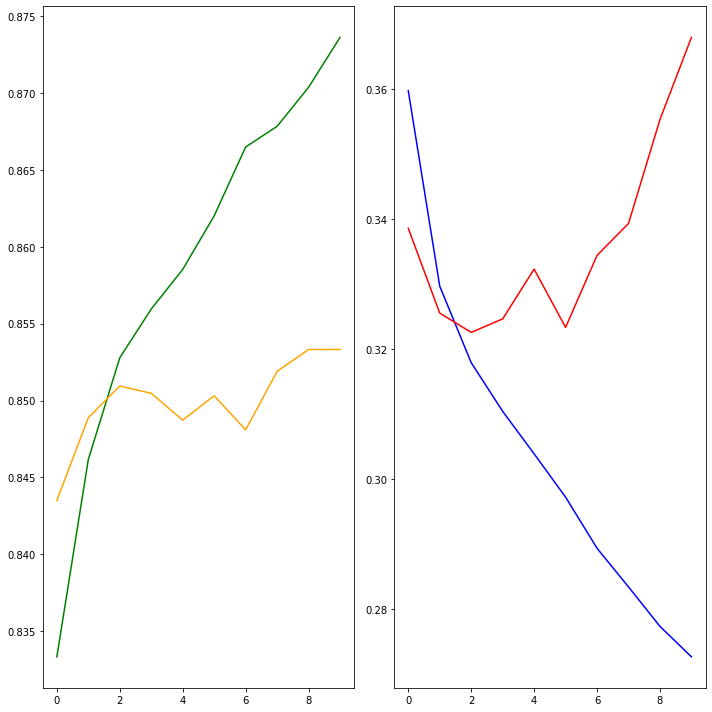

In [36]:
#hist.history
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(hist.history['acc'], color='green')
plt.plot(hist.history['val_acc'], color = 'orange')
plt.subplot(122)
plt.plot(hist.history['loss'], color = 'blue')
plt.plot(hist.history['val_loss'], color='red')
plt.tight_layout()
plt.show()

In [37]:
model.evaluate(X_test, Y_test)
# [0.3700732159614563, 0.841] 비용, 정확도

1000/1000 [==============================] - 0s 21us/step


[0.3829533406496048, 0.837]

In [38]:
pred = model.predict(X_test)

In [39]:
# pred=

In [40]:
#####

In [41]:
# iris 분류
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [42]:
names = [
    'sl',
    'sw',
    'pl',
    'pw',
    'class'
]
df = pd.read_csv('datasets/iris.data', names=names)
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
Y_encoded = LabelEncoder().fit_transform(df['class'])
Y = np_utils.to_categorical(Y_encoded)
X = df.drop('class', axis=1)
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.1, random_state=0)

In [45]:
model= Sequential()
model.add(Dense(256,activation = 'relu', input_shape=(4,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3, activation='softmax'))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
hist = model.fit(X_train, y_train, epochs = 50, validation_split=0.1)

Train on 121 samples, validate on 14 samples
Epoch 1/50
121/121 [==============================] - 0s 2ms/step - loss: 1.0283 - acc: 0.4711 - val_loss: 0.9180 - val_acc: 0.6429
Epoch 2/50
121/121 [==============================] - 0s 41us/step - loss: 0.8539 - acc: 0.7107 - val_loss: 0.7654 - val_acc: 0.6429
Epoch 3/50
121/121 [==============================] - 0s 49us/step - loss: 0.7200 - acc: 0.6942 - val_loss: 0.6676 - val_acc: 0.6429
Epoch 4/50
121/121 [==============================] - 0s 49us/step - loss: 0.6226 - acc: 0.6942 - val_loss: 0.5776 - val_acc: 0.6429
Epoch 5/50
121/121 [==============================] - 0s 41us/step - loss: 0.5459 - acc: 0.7190 - val_loss: 0.4965 - val_acc: 0.6429
Epoch 6/50
121/121 [==============================] - 0s 49us/step - loss: 0.4759 - acc: 0.7851 - val_loss: 0.4390 - val_acc: 0.8571
Epoch 7/50
121/121 [==============================] - 0s 49us/step - loss: 0.4249 - acc: 0.8512 - val_loss: 0.3832 - val_acc: 0.9286
Epoch 8/50
121/121 [=====

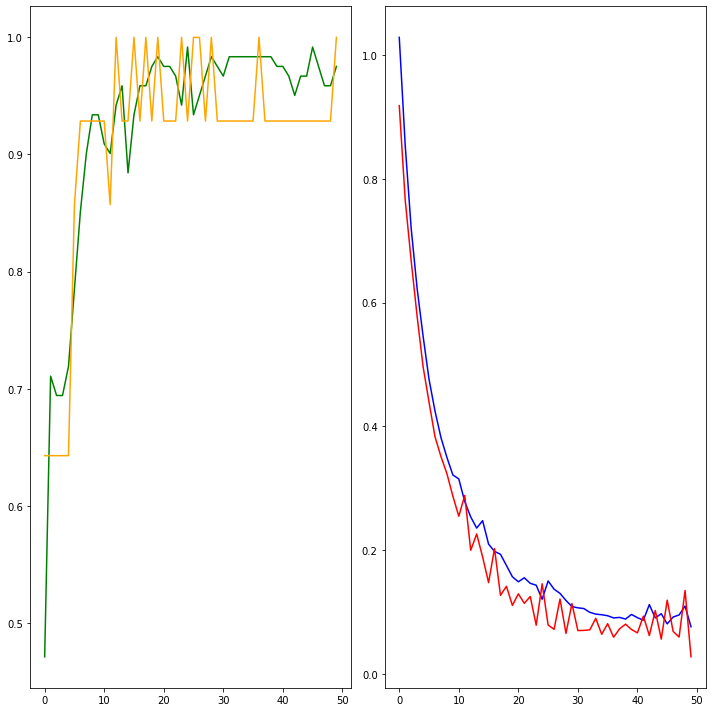

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(hist.history['acc'], color='green')
plt.plot(hist.history['val_acc'], color='orange')
plt.subplot(122)
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')
plt.tight_layout()
plt.show()

In [49]:
loss_score = model.evaluate(X_test, y_test)
print("test loss: {:.2f}".format(loss_score[0]))
print("test acc: {:.2f}".format(loss_score[1]))

15/15 [==============================] - 0s 67us/step
test loss: 0.01
test acc: 1.00


In [50]:
#요약 
# 1. model = Sequential
# 2. model.add(Dense(x, activation='relu', ..))
# 3. model.compile(loss="...", optimizer="adam", )

In [51]:
df = pd.read_excel('datasets/Concrete_Data.xls')

In [52]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [53]:
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':"cement",
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"blast",
    'Fly Ash (component 3)(kg in a m^3 mixture)':"ply",
    'Water  (component 4)(kg in a m^3 mixture)':"water",
    'Superplasticizer (component 5)(kg in a m^3 mixture)':"super",
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse",
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine",
    'Age (day)':"age",
    'Concrete compressive strength(MPa, megapascals) ':"strength"
})

In [54]:
X = df.drop(['strength'], axis=1)
Y = df['strength']

In [124]:
Y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64

In [55]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.1,random_state=0)

In [126]:
X_train.shape, X_test.shape

((927, 8), (103, 8))

In [132]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [134]:
model.compile(loss='mse', optimizer='adam')

In [135]:
hist = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1)

Train on 834 samples, validate on 93 samples
Epoch 1/500
834/834 [==============================] - 0s 585us/step - loss: 642.3961 - val_loss: 203.7581
Epoch 2/500
834/834 [==============================] - 0s 91us/step - loss: 155.6768 - val_loss: 141.4657
Epoch 3/500
834/834 [==============================] - 0s 88us/step - loss: 122.6649 - val_loss: 122.4863
Epoch 4/500
834/834 [==============================] - 0s 91us/step - loss: 109.4264 - val_loss: 113.3694
Epoch 5/500
834/834 [==============================] - 0s 87us/step - loss: 102.7092 - val_loss: 102.9231
Epoch 6/500
834/834 [==============================] - 0s 111us/step - loss: 89.8875 - val_loss: 88.9584
Epoch 7/500
834/834 [==============================] - 0s 91us/step - loss: 81.0827 - val_loss: 83.3025
Epoch 8/500
834/834 [==============================] - 0s 84us/step - loss: 72.3265 - val_loss: 67.3979
Epoch 9/500
834/834 [==============================] - 0s 87us/step - loss: 62.9663 - val_loss: 61.0717
Epoch 1

834/834 [==============================] - 0s 80us/step - loss: 17.3974 - val_loss: 47.9303
Epoch 79/500
834/834 [==============================] - 0s 81us/step - loss: 19.4466 - val_loss: 51.3052
Epoch 80/500
834/834 [==============================] - 0s 83us/step - loss: 20.8693 - val_loss: 41.5221
Epoch 81/500
834/834 [==============================] - 0s 79us/step - loss: 19.1554 - val_loss: 42.0412
Epoch 82/500
834/834 [==============================] - 0s 79us/step - loss: 17.6313 - val_loss: 51.6702
Epoch 83/500
834/834 [==============================] - 0s 83us/step - loss: 17.8785 - val_loss: 45.6319
Epoch 84/500
834/834 [==============================] - 0s 88us/step - loss: 16.0484 - val_loss: 40.6349
Epoch 85/500
834/834 [==============================] - 0s 90us/step - loss: 18.1813 - val_loss: 42.6249
Epoch 86/500
834/834 [==============================] - 0s 88us/step - loss: 17.7514 - val_loss: 40.3126
Epoch 87/500
834/834 [==============================] - 0s 96us/step

834/834 [==============================] - 0s 75us/step - loss: 10.6540 - val_loss: 29.9624
Epoch 156/500
834/834 [==============================] - 0s 74us/step - loss: 10.6336 - val_loss: 28.9672
Epoch 157/500
834/834 [==============================] - 0s 77us/step - loss: 12.5637 - val_loss: 32.6709
Epoch 158/500
834/834 [==============================] - 0s 82us/step - loss: 11.3651 - val_loss: 31.7113
Epoch 159/500
834/834 [==============================] - 0s 97us/step - loss: 11.2870 - val_loss: 34.9309
Epoch 160/500
834/834 [==============================] - 0s 77us/step - loss: 10.9439 - val_loss: 28.1564
Epoch 161/500
834/834 [==============================] - 0s 78us/step - loss: 11.8681 - val_loss: 29.0785
Epoch 162/500
834/834 [==============================] - 0s 81us/step - loss: 12.2588 - val_loss: 31.4010
Epoch 163/500
834/834 [==============================] - 0s 81us/step - loss: 12.3608 - val_loss: 36.7255
Epoch 164/500
834/834 [==============================] - 0s 

834/834 [==============================] - 0s 80us/step - loss: 9.0896 - val_loss: 25.7924
Epoch 233/500
834/834 [==============================] - 0s 85us/step - loss: 8.9729 - val_loss: 24.5697
Epoch 234/500
834/834 [==============================] - 0s 77us/step - loss: 8.7546 - val_loss: 28.1927
Epoch 235/500
834/834 [==============================] - 0s 75us/step - loss: 9.1193 - val_loss: 27.5190
Epoch 236/500
834/834 [==============================] - 0s 75us/step - loss: 9.9230 - val_loss: 25.8870
Epoch 237/500
834/834 [==============================] - 0s 81us/step - loss: 9.0618 - val_loss: 27.4484
Epoch 238/500
834/834 [==============================] - 0s 77us/step - loss: 9.3963 - val_loss: 24.7784
Epoch 239/500
834/834 [==============================] - 0s 75us/step - loss: 8.9516 - val_loss: 24.0878
Epoch 240/500
834/834 [==============================] - 0s 77us/step - loss: 9.9096 - val_loss: 25.4272
Epoch 241/500
834/834 [==============================] - 0s 74us/step

834/834 [==============================] - 0s 86us/step - loss: 7.7544 - val_loss: 24.1311
Epoch 311/500
834/834 [==============================] - 0s 81us/step - loss: 7.6288 - val_loss: 26.1162
Epoch 312/500
834/834 [==============================] - 0s 84us/step - loss: 7.5018 - val_loss: 23.8871
Epoch 313/500
834/834 [==============================] - 0s 85us/step - loss: 8.2341 - val_loss: 24.2526
Epoch 314/500
834/834 [==============================] - 0s 87us/step - loss: 7.7117 - val_loss: 24.3733
Epoch 315/500
834/834 [==============================] - 0s 82us/step - loss: 7.7746 - val_loss: 27.3986
Epoch 316/500
834/834 [==============================] - 0s 85us/step - loss: 8.6195 - val_loss: 29.2742
Epoch 317/500
834/834 [==============================] - 0s 77us/step - loss: 8.2162 - val_loss: 23.6861
Epoch 318/500
834/834 [==============================] - 0s 79us/step - loss: 8.1745 - val_loss: 27.2176
Epoch 319/500
834/834 [==============================] - 0s 86us/step

834/834 [==============================] - 0s 81us/step - loss: 6.5509 - val_loss: 25.1133
Epoch 389/500
834/834 [==============================] - 0s 86us/step - loss: 6.6045 - val_loss: 25.6488
Epoch 390/500
834/834 [==============================] - 0s 86us/step - loss: 6.2186 - val_loss: 29.3989
Epoch 391/500
834/834 [==============================] - 0s 85us/step - loss: 6.3685 - val_loss: 24.4523
Epoch 392/500
834/834 [==============================] - 0s 80us/step - loss: 7.0175 - val_loss: 29.5875
Epoch 393/500
834/834 [==============================] - 0s 80us/step - loss: 6.5011 - val_loss: 22.6892
Epoch 394/500
834/834 [==============================] - 0s 85us/step - loss: 6.5329 - val_loss: 29.3090
Epoch 395/500
834/834 [==============================] - 0s 86us/step - loss: 7.3731 - val_loss: 22.2506
Epoch 396/500
834/834 [==============================] - 0s 81us/step - loss: 6.6029 - val_loss: 24.6102
Epoch 397/500
834/834 [==============================] - 0s 81us/step

834/834 [==============================] - 0s 78us/step - loss: 5.8052 - val_loss: 22.7826
Epoch 467/500
834/834 [==============================] - 0s 90us/step - loss: 5.5690 - val_loss: 25.4882
Epoch 468/500
834/834 [==============================] - 0s 85us/step - loss: 5.3119 - val_loss: 22.4584
Epoch 469/500
834/834 [==============================] - 0s 83us/step - loss: 5.9045 - val_loss: 24.4679
Epoch 470/500
834/834 [==============================] - 0s 80us/step - loss: 7.6926 - val_loss: 23.0023
Epoch 471/500
834/834 [==============================] - 0s 83us/step - loss: 6.5432 - val_loss: 23.7150
Epoch 472/500
834/834 [==============================] - 0s 80us/step - loss: 5.8056 - val_loss: 23.8901
Epoch 473/500
834/834 [==============================] - 0s 86us/step - loss: 5.9911 - val_loss: 23.0080
Epoch 474/500
834/834 [==============================] - 0s 86us/step - loss: 5.2355 - val_loss: 22.5964
Epoch 475/500
834/834 [==============================] - 0s 85us/step

In [137]:
loss_score = model.evaluate(X_test, y_test)
loss_score

103/103 [==============================] - 0s 2ms/step


37.59703179702018

In [138]:
pred = model.predict(X_test[-5:])

In [139]:
pred

array([[46.967674],
       [31.94066 ],
       [17.66295 ],
       [19.204203],
       [27.659786]], dtype=float32)

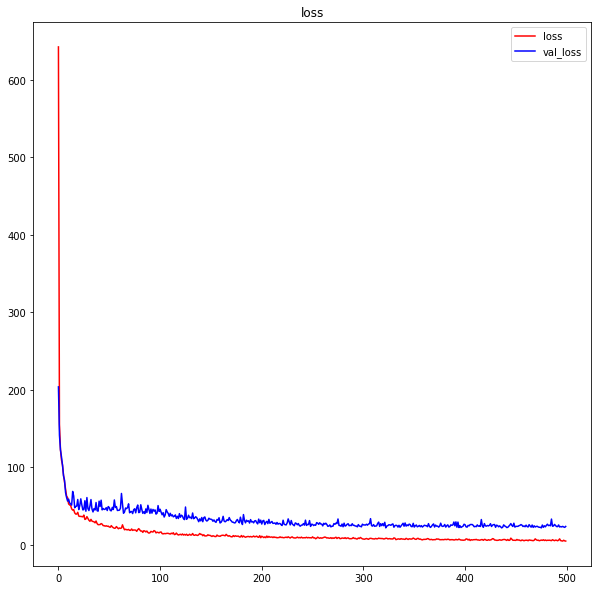

In [140]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.title('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [128]:
####################################

In [106]:
import keras

In [107]:
mnist = keras.datasets.mnist

In [108]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
# 처음실행시 다운로드 한 후 메모리에 올려준다. 

In [109]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [110]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [111]:
y_train[0] #첫번째 정답은 5

5

In [112]:
type(y_train)

numpy.ndarray

In [113]:
np.set_printoptions(linewidth=1000) #default 75

In [114]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [115]:
y_train[898]

7

In [116]:
x_train = x_train / 255.0

In [117]:
y_train = y_train

In [118]:
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential

In [119]:
model= Sequential()

In [120]:
#2차원 데이터를 우선 1차원으로 바꿔준다. 
model.add(Flatten(input_shape=(28,28))) # 28*28 image => 784 
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2)) #20% 
model.add(Dense(10, activation = "softmax"))

In [121]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [122]:
model.fit(x_train, y_train, epochs=5)
# 

Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.3003 - acc: 0.9125
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1452 - acc: 0.9571
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1085 - acc: 0.9672
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0900 - acc: 0.9724
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0775 - acc: 0.9756


In [123]:
model.evaluate(x_test,y_test)
# [0.4014525500646043, 0.975] loss, accuracy

10000/10000 [==============================] - 0s 23us/step


[0.4014525500646043, 0.975]

In [141]:
######################################## 

In [142]:
# 혈중 지방 함량치 예측 


In [143]:
raw_data = np.genfromtxt('datasets/blood_fat.csv', delimiter=",", skip_header=1)

In [146]:
raw_data
# Index, on, weight,age, bloodfat

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

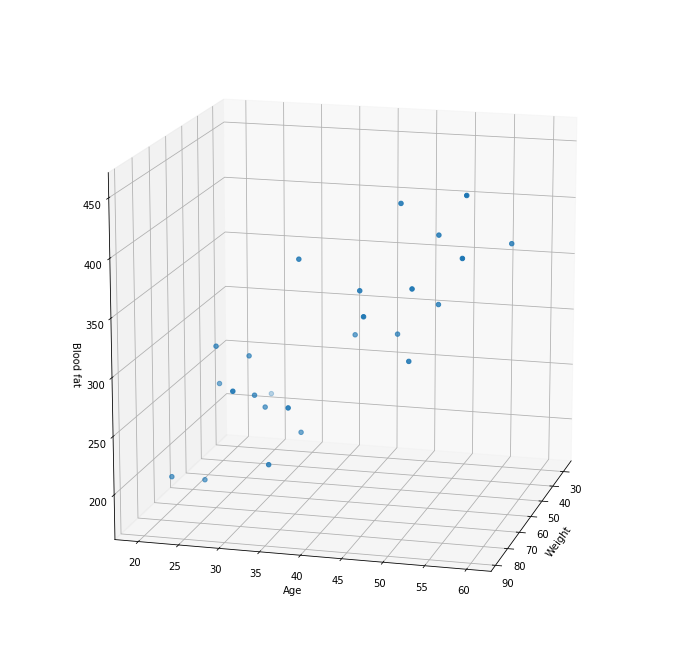

In [160]:
# 3차원 공간에서 regression을 해보자
from mpl_toolkits.mplot3d import Axes3D
xs = np.array(raw_data[:,2], dtype= np.float32) # weight 말하는거임
# Index, on, weight,age, bloodfat 
ys = np.array(raw_data[:,3], dtype= np.float32) # age 
zs = np.array(raw_data[:,4], dtype= np.float32) #bloodfat

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs,ys,zs)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15,15)
plt.show()

In [164]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32) 
y_data = np.array(raw_data[:,4], dtype=np.float32)
y_data.shape

(25,)

In [163]:
y_data = y_data.reshape((-1,1))
y_data.shape

(25, 1)

In [166]:
from keras.optimizers import RMSprop

In [167]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss='mse', optimizer=RMSprop(lr=0.01))

In [168]:
hist = model.fit(x_data, y_data, epochs=2000)

Epoch 1/2000
25/25 [==============================] - 0s 11ms/step - loss: 62927.2852
Epoch 2/2000
25/25 [==============================] - 0s 41us/step - loss: 61245.9609
Epoch 3/2000
25/25 [==============================] - 0s 40us/step - loss: 60049.7695
Epoch 4/2000
25/25 [==============================] - 0s 40us/step - loss: 59062.0391
Epoch 5/2000
25/25 [==============================] - 0s 40us/step - loss: 58195.3711
Epoch 6/2000
25/25 [==============================] - 0s 40us/step - loss: 57409.2539
Epoch 7/2000
25/25 [==============================] - 0s 40us/step - loss: 56681.1992
Epoch 8/2000
25/25 [==============================] - 0s 40us/step - loss: 55997.2148
Epoch 9/2000
25/25 [==============================] - 0s 80us/step - loss: 55347.9414
Epoch 10/2000
25/25 [==============================] - 0s 40us/step - loss: 54726.8008
Epoch 11/2000
25/25 [==============================] - 0s 40us/step - loss: 54128.9336
Epoch 12/2000
25/25 [==============================]

Epoch 96/2000
25/25 [==============================] - 0s 0us/step - loss: 21713.6074
Epoch 97/2000
25/25 [==============================] - 0s 40us/step - loss: 21442.0391
Epoch 98/2000
25/25 [==============================] - 0s 40us/step - loss: 21172.7383
Epoch 99/2000
25/25 [==============================] - 0s 80us/step - loss: 20905.6934
Epoch 100/2000
25/25 [==============================] - 0s 40us/step - loss: 20640.9082
Epoch 101/2000
25/25 [==============================] - 0s 0us/step - loss: 20378.3789
Epoch 102/2000
25/25 [==============================] - 0s 40us/step - loss: 20118.1016
Epoch 103/2000
25/25 [==============================] - 0s 40us/step - loss: 19860.0781
Epoch 104/2000
25/25 [==============================] - 0s 40us/step - loss: 19604.3047
Epoch 105/2000
25/25 [==============================] - 0s 0us/step - loss: 19350.7812
Epoch 106/2000
25/25 [==============================] - 0s 40us/step - loss: 19099.5098
Epoch 107/2000
25/25 [=================

Epoch 190/2000
25/25 [==============================] - 0s 40us/step - loss: 5769.3193
Epoch 191/2000
25/25 [==============================] - 0s 0us/step - loss: 5698.3999
Epoch 192/2000
25/25 [==============================] - 0s 40us/step - loss: 5629.3545
Epoch 193/2000
25/25 [==============================] - 0s 40us/step - loss: 5562.1724
Epoch 194/2000
25/25 [==============================] - 0s 40us/step - loss: 5496.8389
Epoch 195/2000
25/25 [==============================] - 0s 40us/step - loss: 5433.3457
Epoch 196/2000
25/25 [==============================] - 0s 0us/step - loss: 5371.6782
Epoch 197/2000
25/25 [==============================] - 0s 40us/step - loss: 5311.8213
Epoch 198/2000
25/25 [==============================] - 0s 40us/step - loss: 5253.7612
Epoch 199/2000
25/25 [==============================] - 0s 40us/step - loss: 5197.4849
Epoch 200/2000
25/25 [==============================] - 0s 0us/step - loss: 5142.9790
Epoch 201/2000
25/25 [========================

Epoch 285/2000
25/25 [==============================] - 0s 0us/step - loss: 3671.1606
Epoch 286/2000
25/25 [==============================] - 0s 40us/step - loss: 3660.6670
Epoch 287/2000
25/25 [==============================] - 0s 40us/step - loss: 3650.2051
Epoch 288/2000
25/25 [==============================] - 0s 40us/step - loss: 3639.7732
Epoch 289/2000
25/25 [==============================] - 0s 40us/step - loss: 3629.3748
Epoch 290/2000
25/25 [==============================] - 0s 40us/step - loss: 3619.0066
Epoch 291/2000
25/25 [==============================] - 0s 40us/step - loss: 3608.6716
Epoch 292/2000
25/25 [==============================] - 0s 40us/step - loss: 3598.3701
Epoch 293/2000
25/25 [==============================] - 0s 40us/step - loss: 3588.1030
Epoch 294/2000
25/25 [==============================] - 0s 40us/step - loss: 3577.8684
Epoch 295/2000
25/25 [==============================] - 0s 40us/step - loss: 3567.6682
Epoch 296/2000
25/25 [======================

Epoch 380/2000
25/25 [==============================] - 0s 40us/step - loss: 2822.6934
Epoch 381/2000
25/25 [==============================] - 0s 40us/step - loss: 2815.2837
Epoch 382/2000
25/25 [==============================] - 0s 40us/step - loss: 2807.8430
Epoch 383/2000
25/25 [==============================] - 0s 39us/step - loss: 2800.4773
Epoch 384/2000
25/25 [==============================] - 0s 40us/step - loss: 2793.1157
Epoch 385/2000
25/25 [==============================] - 0s 40us/step - loss: 2785.8091
Epoch 386/2000
25/25 [==============================] - 0s 40us/step - loss: 2778.5159
Epoch 387/2000
25/25 [==============================] - 0s 40us/step - loss: 2771.2690
Epoch 388/2000
25/25 [==============================] - 0s 40us/step - loss: 2764.0371
Epoch 389/2000
25/25 [==============================] - 0s 40us/step - loss: 2756.8503
Epoch 390/2000
25/25 [==============================] - 0s 40us/step - loss: 2749.6790
Epoch 391/2000
25/25 [=====================

Epoch 475/2000
25/25 [==============================] - 0s 40us/step - loss: 2249.2373
Epoch 476/2000
25/25 [==============================] - 0s 80us/step - loss: 2244.5979
Epoch 477/2000
25/25 [==============================] - 0s 80us/step - loss: 2240.0188
Epoch 478/2000
25/25 [==============================] - 0s 0us/step - loss: 2235.4377
Epoch 479/2000
25/25 [==============================] - 0s 40us/step - loss: 2230.9163
Epoch 480/2000
25/25 [==============================] - 0s 40us/step - loss: 2226.3926
Epoch 481/2000
25/25 [==============================] - 0s 40us/step - loss: 2221.9294
Epoch 482/2000
25/25 [==============================] - 0s 80us/step - loss: 2217.4641
Epoch 483/2000
25/25 [==============================] - 0s 80us/step - loss: 2213.0583
Epoch 484/2000
25/25 [==============================] - 0s 80us/step - loss: 2208.6516
Epoch 485/2000
25/25 [==============================] - 0s 40us/step - loss: 2204.3030
Epoch 486/2000
25/25 [======================

Epoch 570/2000
25/25 [==============================] - 0s 40us/step - loss: 1937.9437
Epoch 571/2000
25/25 [==============================] - 0s 40us/step - loss: 1936.0261
Epoch 572/2000
25/25 [==============================] - 0s 40us/step - loss: 1934.1058
Epoch 573/2000
25/25 [==============================] - 0s 40us/step - loss: 1932.2418
Epoch 574/2000
25/25 [==============================] - 0s 40us/step - loss: 1930.3751
Epoch 575/2000
25/25 [==============================] - 0s 40us/step - loss: 1928.5649
Epoch 576/2000
25/25 [==============================] - 0s 0us/step - loss: 1926.7522
Epoch 577/2000
25/25 [==============================] - 0s 40us/step - loss: 1924.9956
Epoch 578/2000
25/25 [==============================] - 0s 0us/step - loss: 1923.2362
Epoch 579/2000
25/25 [==============================] - 0s 40us/step - loss: 1921.5322
Epoch 580/2000
25/25 [==============================] - 0s 40us/step - loss: 1919.8259
Epoch 581/2000
25/25 [=======================

Epoch 665/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.9854
Epoch 666/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.9001
Epoch 667/2000
25/25 [==============================] - 0s 41us/step - loss: 1858.8241
Epoch 668/2000
25/25 [==============================] - 0s 79us/step - loss: 1858.7461
Epoch 669/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.6753
Epoch 670/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.6033
Epoch 671/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.5375
Epoch 672/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.4700
Epoch 673/2000
25/25 [==============================] - 0s 41us/step - loss: 1858.4086
Epoch 674/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.3456
Epoch 675/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.2875
Epoch 676/2000
25/25 [=====================

Epoch 760/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.7479
Epoch 761/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.7104
Epoch 762/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.6709
Epoch 763/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.6334
Epoch 764/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.5941
Epoch 765/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.5565
Epoch 766/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.5171
Epoch 767/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.4792
Epoch 768/2000
25/25 [==============================] - 0s 0us/step - loss: 1854.4403
Epoch 769/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.4025
Epoch 770/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.3627
Epoch 771/2000
25/25 [======================

Epoch 855/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.1097
Epoch 856/2000
25/25 [==============================] - 0s 0us/step - loss: 1851.0710
Epoch 857/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.0342
Epoch 858/2000
25/25 [==============================] - 0s 0us/step - loss: 1850.9944
Epoch 859/2000
25/25 [==============================] - 0s 40us/step - loss: 1850.9576
Epoch 860/2000
25/25 [==============================] - 0s 0us/step - loss: 1850.9187
Epoch 861/2000
25/25 [==============================] - 0s 40us/step - loss: 1850.8818
Epoch 862/2000
25/25 [==============================] - 0s 40us/step - loss: 1850.8423
Epoch 863/2000
25/25 [==============================] - 0s 40us/step - loss: 1850.8062
Epoch 864/2000
25/25 [==============================] - 0s 40us/step - loss: 1850.7666
Epoch 865/2000
25/25 [==============================] - 0s 40us/step - loss: 1850.7294
Epoch 866/2000
25/25 [========================

Epoch 950/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.5205
Epoch 951/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.4845
Epoch 952/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.4457
Epoch 953/2000
25/25 [==============================] - 0s 80us/step - loss: 1847.4092
Epoch 954/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.3706
Epoch 955/2000
25/25 [==============================] - 0s 0us/step - loss: 1847.3341
Epoch 956/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.2959
Epoch 957/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.2593
Epoch 958/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.2206
Epoch 959/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.1843
Epoch 960/2000
25/25 [==============================] - 0s 41us/step - loss: 1847.1462
Epoch 961/2000
25/25 [======================

Epoch 1044/2000
25/25 [==============================] - 0s 0us/step - loss: 1844.0201
Epoch 1045/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.9847
Epoch 1046/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.9468
Epoch 1047/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.9106
Epoch 1048/2000
25/25 [==============================] - 0s 41us/step - loss: 1843.8727
Epoch 1049/2000
25/25 [==============================] - 0s 0us/step - loss: 1843.8367
Epoch 1050/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.7987
Epoch 1051/2000
25/25 [==============================] - 0s 0us/step - loss: 1843.7628
Epoch 1052/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.7245
Epoch 1053/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.6886
Epoch 1054/2000
25/25 [==============================] - 0s 0us/step - loss: 1843.6509
Epoch 1055/2000
25/25 [=============

Epoch 1138/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.5702
Epoch 1139/2000
25/25 [==============================] - 0s 0us/step - loss: 1840.5342
Epoch 1140/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.4966
Epoch 1141/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.4611
Epoch 1142/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.4241
Epoch 1143/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.3883
Epoch 1144/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.3508
Epoch 1145/2000
25/25 [==============================] - 0s 41us/step - loss: 1840.3160
Epoch 1146/2000
25/25 [==============================] - 0s 39us/step - loss: 1840.2781
Epoch 1147/2000
25/25 [==============================] - 0s 41us/step - loss: 1840.2433
Epoch 1148/2000
25/25 [==============================] - 0s 39us/step - loss: 1840.2056
Epoch 1149/2000
25/25 [==========

Epoch 1232/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.1685
Epoch 1233/2000
25/25 [==============================] - 0s 0us/step - loss: 1837.1339
Epoch 1234/2000
25/25 [==============================] - 0s 0us/step - loss: 1837.0966
Epoch 1235/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.0620
Epoch 1236/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.0255
Epoch 1237/2000
25/25 [==============================] - 0s 40us/step - loss: 1836.9900
Epoch 1238/2000
25/25 [==============================] - 0s 0us/step - loss: 1836.9531
Epoch 1239/2000
25/25 [==============================] - 0s 40us/step - loss: 1836.9183
Epoch 1240/2000
25/25 [==============================] - 0s 40us/step - loss: 1836.8810
Epoch 1241/2000
25/25 [==============================] - 0s 0us/step - loss: 1836.8462
Epoch 1242/2000
25/25 [==============================] - 0s 40us/step - loss: 1836.8097
Epoch 1243/2000
25/25 [=============

Epoch 1326/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.8170
Epoch 1327/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.7828
Epoch 1328/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.7461
Epoch 1329/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.7120
Epoch 1330/2000
25/25 [==============================] - 0s 0us/step - loss: 1833.6754
Epoch 1331/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.6411
Epoch 1332/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.6051
Epoch 1333/2000
25/25 [==============================] - 0s 0us/step - loss: 1833.5702
Epoch 1334/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.5337
Epoch 1335/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.4995
Epoch 1336/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.4633
Epoch 1337/2000
25/25 [===========

Epoch 1420/2000
25/25 [==============================] - 0s 41us/step - loss: 1830.5150
Epoch 1421/2000
25/25 [==============================] - 0s 39us/step - loss: 1830.4811
Epoch 1422/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.4452
Epoch 1423/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.4116
Epoch 1424/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.3754
Epoch 1425/2000
25/25 [==============================] - 0s 0us/step - loss: 1830.3420
Epoch 1426/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.3058
Epoch 1427/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.2722
Epoch 1428/2000
25/25 [==============================] - 0s 0us/step - loss: 1830.2365
Epoch 1429/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.2031
Epoch 1430/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.1669
Epoch 1431/2000
25/25 [===========

Epoch 1514/2000
25/25 [==============================] - 0s 0us/step - loss: 1827.2627
Epoch 1515/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.2295
Epoch 1516/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.1943
Epoch 1517/2000
25/25 [==============================] - 0s 0us/step - loss: 1827.1611
Epoch 1518/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.1254
Epoch 1519/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.0922
Epoch 1520/2000
25/25 [==============================] - 0s 0us/step - loss: 1827.0570
Epoch 1521/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.0240
Epoch 1522/2000
25/25 [==============================] - 0s 40us/step - loss: 1826.9886
Epoch 1523/2000
25/25 [==============================] - 0s 40us/step - loss: 1826.9548
Epoch 1524/2000
25/25 [==============================] - 0s 40us/step - loss: 1826.9197
Epoch 1525/2000
25/25 [============

Epoch 1608/2000
25/25 [==============================] - 0s 40us/step - loss: 1824.0598
Epoch 1609/2000
25/25 [==============================] - 0s 40us/step - loss: 1824.0275
Epoch 1610/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.9926
Epoch 1611/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.9600
Epoch 1612/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.9248
Epoch 1613/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.8922
Epoch 1614/2000
25/25 [==============================] - 0s 0us/step - loss: 1823.8575
Epoch 1615/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.8247
Epoch 1616/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.7902
Epoch 1617/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.7568
Epoch 1618/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.7225
Epoch 1619/2000
25/25 [==========

Epoch 1702/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.9070
Epoch 1703/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.8746
Epoch 1704/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.8403
Epoch 1705/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.8082
Epoch 1706/2000
25/25 [==============================] - 0s 0us/step - loss: 1820.7739
Epoch 1707/2000
25/25 [==============================] - 0s 39us/step - loss: 1820.7423
Epoch 1708/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.7075
Epoch 1709/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.6754
Epoch 1710/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.6411
Epoch 1711/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.6089
Epoch 1712/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.5750
Epoch 1713/2000
25/25 [==========

Epoch 1796/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.8035
Epoch 1797/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.7719
Epoch 1798/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.7382
Epoch 1799/2000
25/25 [==============================] - 0s 0us/step - loss: 1817.7063
Epoch 1800/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.6729
Epoch 1801/2000
25/25 [==============================] - 0s 0us/step - loss: 1817.6407
Epoch 1802/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.6072
Epoch 1803/2000
25/25 [==============================] - 0s 0us/step - loss: 1817.5754
Epoch 1804/2000
25/25 [==============================] - 0s 41us/step - loss: 1817.5417
Epoch 1805/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.5099
Epoch 1806/2000
25/25 [==============================] - 0s 79us/step - loss: 1817.4764
Epoch 1807/2000
25/25 [============

Epoch 1890/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.7494
Epoch 1891/2000
25/25 [==============================] - 0s 0us/step - loss: 1814.7181
Epoch 1892/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.6847
Epoch 1893/2000
25/25 [==============================] - 0s 39us/step - loss: 1814.6538
Epoch 1894/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.6204
Epoch 1895/2000
25/25 [==============================] - 0s 0us/step - loss: 1814.5891
Epoch 1896/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.5563
Epoch 1897/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.5249
Epoch 1898/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.4916
Epoch 1899/2000
25/25 [==============================] - 0s 0us/step - loss: 1814.4606
Epoch 1900/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.4280
Epoch 1901/2000
25/25 [============

Epoch 1984/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.7445
Epoch 1985/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.7142
Epoch 1986/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.6815
Epoch 1987/2000
25/25 [==============================] - 0s 0us/step - loss: 1811.6509
Epoch 1988/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.6178
Epoch 1989/2000
25/25 [==============================] - 0s 0us/step - loss: 1811.5875
Epoch 1990/2000
25/25 [==============================] - 0s 41us/step - loss: 1811.5553
Epoch 1991/2000
25/25 [==============================] - 0s 39us/step - loss: 1811.5245
Epoch 1992/2000
25/25 [==============================] - 0s 39us/step - loss: 1811.4911
Epoch 1993/2000
25/25 [==============================] - 0s 41us/step - loss: 1811.4609
Epoch 1994/2000
25/25 [==============================] - 0s 39us/step - loss: 1811.4281
Epoch 1995/2000
25/25 [===========

<function matplotlib.pyplot.show(*args, **kw)>

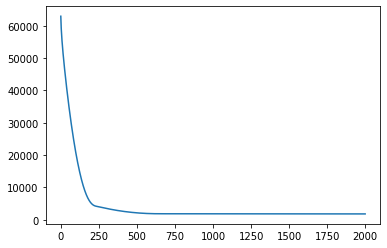

In [169]:
plt.plot(hist.history['loss'])
plt.show

In [176]:
model.predict(np.array([100,40]).reshape(1,2)) #100kg 40殺
# array([[348.73566]]

array([[348.73566]], dtype=float32)

In [171]:
model.predict(np.array([60,25]).reshape(1,2))
# array([[222.33034]]

array([[222.33034]], dtype=float32)

In [172]:
model.get_weights()
# [1.0949825], [5.507069 ] 기울기
# [18.954662] 절편

[array([[1.0949825],
        [5.507069 ]], dtype=float32),
 array([18.954662], dtype=float32)]

In [178]:
W_, b_ = model.get_weights()
print(W_) #기울기
print(b_) # 절편

[[1.0949825]
 [5.507069 ]]
[18.954662]


In [190]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X,W_) +b_


(50, 1)

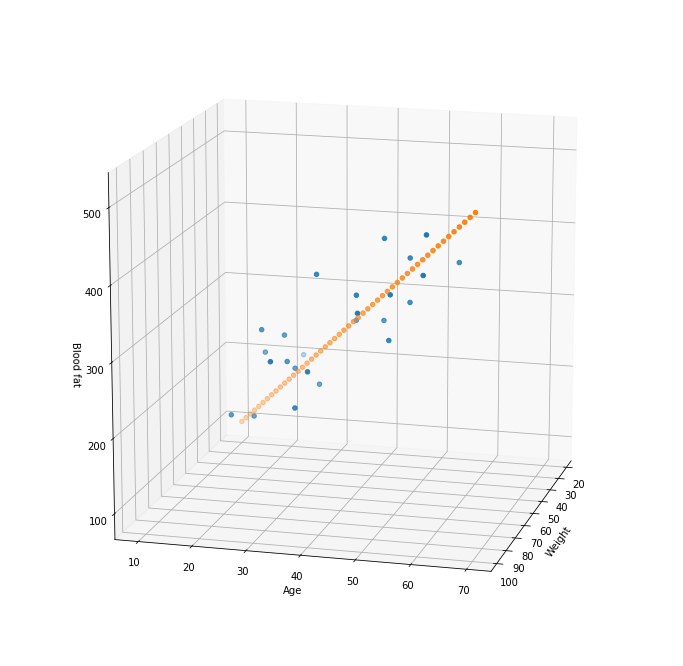

In [197]:
# 3차원 공간에서 regression을 해보자
from mpl_toolkits.mplot3d import Axes3D
xs = np.array(raw_data[:,2], dtype= np.float32) # weight 말하는거임
# Index, on, weight,age, bloodfat 
ys = np.array(raw_data[:,3], dtype= np.float32) # age 
zs = np.array(raw_data[:,4], dtype= np.float32) #bloodfat

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs,ys,zs)
ax.scatter(x,y,Z)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15,15)
plt.show()